### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainy), (testX, testy) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testy[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
trainY = tf.keras.utils.to_categorical(trainy)
testY = tf.keras.utils.to_categorical(testy)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

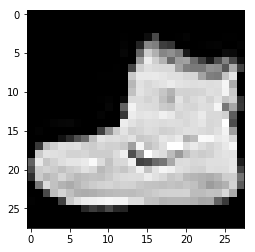

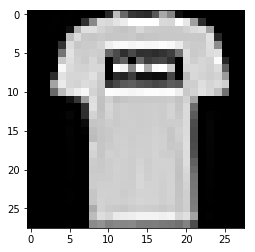

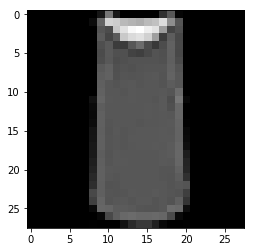

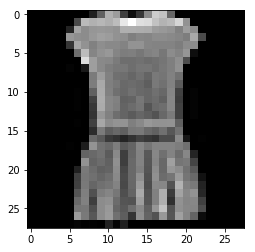

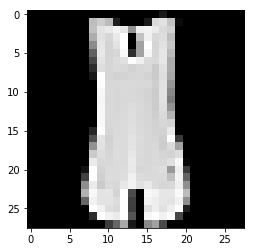

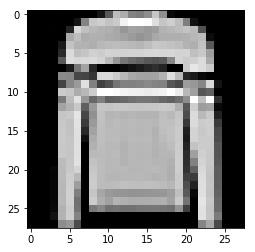

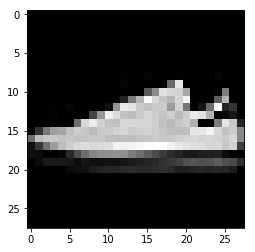

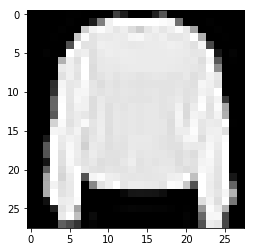

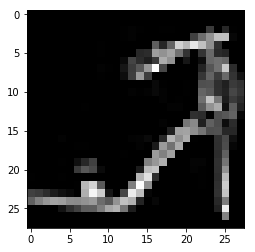

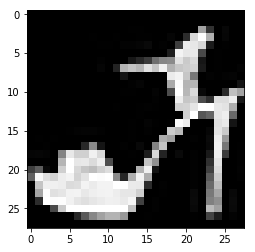

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

for idx in range(1,11):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(trainX[idx-1], cmap=mpl.cm.gray)
    plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD 
from keras import utils 
import numpy as np 

batch_size = 100 
n_classes = 10
n_inputs = 784
n_epochs = 10

trainX = trainX.reshape( 60000, n_inputs) 
testX = testX.reshape( 10000, n_inputs)

# convert the input values to float32 
trainX = trainX.astype( np.float32) 
testX = testX.astype( np.float32)

# normalize the values of image vectors to fit under 1 
trainX /= 255 
testX /= 255 

# build a sequential model 

model1 = Sequential() # the first layer has to specify the dimensions of the input vector 
model1.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model1.add( Dropout( 0.1)) 
model1.add( Dense( units = 128, activation ='sigmoid')) 
model1.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model1.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model1.summary()

# compile the model 
model1.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________

### Execute the model using model.fit()

In [16]:
# train the model 
model1.fit( trainX, trainY, batch_size = batch_size, epochs = n_epochs)
# evaluate the model and print the accuracy score 
scores = model1.evaluate( testX, testY)
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[ 1])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.2712 - acc: 0.1488
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 2.0826 - acc: 0.2872
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.8023 - acc: 0.4013
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.5383 - acc: 0.4789
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.3554 - acc: 0.5323
Epoch 6/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.2349 - acc: 0.5606
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.1474 - acc: 0.5879
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.0795 - acc: 0.6078
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.0265 - acc: 0.6269
Epoch 10/10
10000/10000 [===========================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [17]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization


# build a sequential model 
model2 = Sequential() # the first layer has to specify the dimensions of the input vector 
model2.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model2.add(BatchNormalization())
model2.add( Dropout( 0.1)) 
model2.add( Dense( units = 128, activation ='sigmoid'))
model2.add(BatchNormalization())
model2.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model2.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model2.summary()

# compile the model 
model2.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy'])
# train the model 
model2.fit(trainX, trainY, batch_size = batch_size, epochs = n_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

### Execute the model

In [18]:
# evaluate the model and print the accuracy score 
scores = model2.evaluate( testX, testY)
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 1s 76us/step
\ n loss: 0.4398677951335907
\ n accuracy: 0.8429


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [19]:
# compile the model 
model2.compile( loss ='categorical_crossentropy', optimizer = SGD(lr=0.001), metrics =['accuracy'])
# train the model 
model2.fit(trainX, trainY, batch_size = batch_size, epochs = n_epochs)

Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.4192 - acc: 0.8530
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.4160 - acc: 0.8541
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4183 - acc: 0.8543
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.4158 - acc: 0.8549
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.4163 - acc: 0.8545
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.4182 - acc: 0.8529
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.4166 - acc: 0.8534
Epoch 8/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4147 - acc: 0.8540
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4136 - acc: 0.8549
Epoch 10/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.4131 - acc: 0.855

In [20]:
# evaluate the model and print the accuracy score 
scores = model2.evaluate( testX, testY)
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 1s 82us/step
\ n loss: 0.4294842966079712
\ n accuracy: 0.8473


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [21]:
# build a sequential model 
model3 = Sequential() # the first layer has to specify the dimensions of the input vector 
model3.add( Dense( units = 100, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model3.add( Dropout( 0.1)) 
model3.add( Dense( units = 100, activation ='sigmoid')) 
model3.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model3.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# compile the model 
model3.compile( loss ='categorical_crossentropy', optimizer = SGD(lr=0.03), metrics =['accuracy']) 

## Review model

In [23]:
# train the model 
model3.fit(trainX, trainY, batch_size = batch_size, epochs = n_epochs)

Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.1031 - acc: 0.2599
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 1.4671 - acc: 0.5094
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.1233 - acc: 0.6100
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.9484 - acc: 0.6611
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.8407 - acc: 0.6988
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.7700 - acc: 0.7190
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.7191 - acc: 0.7354
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.6866 - acc: 0.7469
Epoch 9/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.6621 - acc: 0.7543
Epoch 10/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.6392 - acc: 0.7636

### Run the model

In [24]:
# evaluate the model and print the accuracy score 
scores = model3.evaluate(testX, testY)
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 1s 62us/step
\ n loss: 0.6058601837158203
\ n accuracy: 0.7773


In [33]:
predicted_classes = model3.predict_classes(testX)
correct_indices = np.nonzero(predicted_classes == testy)[0]
incorrect_indices = np.nonzero(predicted_classes != testy)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


7773  classified correctly
2227  classified incorrectly


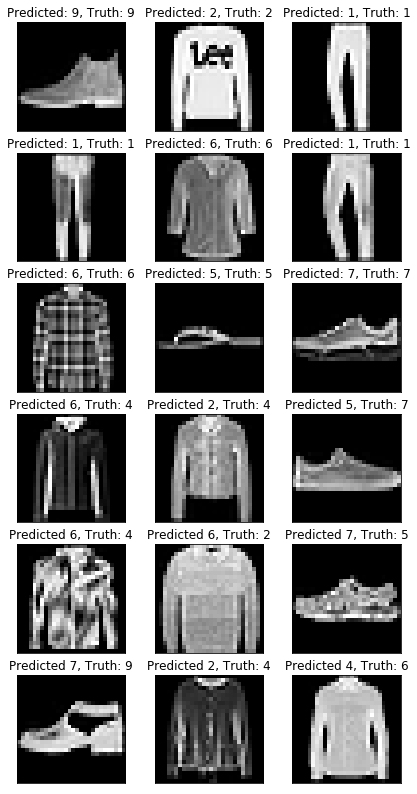

In [35]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(testX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        testy[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(testX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       testy[incorrect]))
    plt.xticks([])
    plt.yticks([])